Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

1.	 Id number: 1 to 214

2.	 RI: refractive index

3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.	Mg: Magnesium

5.	Al: Aluminum

6.	Si: Silicon

7.	K: Potassium

8.	Ca: Calcium

9.	Ba: Barium

10.	Fe: Iron

11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns=['ID','RI','NA','MG','AL','SI','K','CA','BA','FE','Glass Types']

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',names=columns)

In [4]:
data

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Glass Types
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df=pd.DataFrame(data=data)

# Exploratory Data Analysis

In [6]:
# Viewing the dataset
df

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Glass Types
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
df.head(10)

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Glass Types
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [8]:
df.tail(10)

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,Glass Types
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


Checking the shape of the dataset

In [9]:
df.shape

(214, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           214 non-null    int64  
 1   RI           214 non-null    float64
 2   NA           214 non-null    float64
 3   MG           214 non-null    float64
 4   AL           214 non-null    float64
 5   SI           214 non-null    float64
 6   K            214 non-null    float64
 7   CA           214 non-null    float64
 8   BA           214 non-null    float64
 9   FE           214 non-null    float64
 10  Glass Types  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


1. There are 214 rows and 11 columns present in the dataset.
2. Out of 11 columns, 10 are features and 'Glass type' is the target variable.
3. The dataset has all numerical features. All the independent features are continuous variables. The target is discrete numerical variable to identify the classes of a glass.
4. No null value can be observed. However, further analysis is required.
5. Since, class of a glass is required to predict, hence, classification model need to be applied.

Checking Null values

In [11]:
df.isnull().sum()

ID             0
RI             0
NA             0
MG             0
AL             0
SI             0
K              0
CA             0
BA             0
FE             0
Glass Types    0
dtype: int64

Checking the total sum of null values

In [12]:
df.isnull().sum().sum()

0

Checking null values using heatmap

<Axes: >

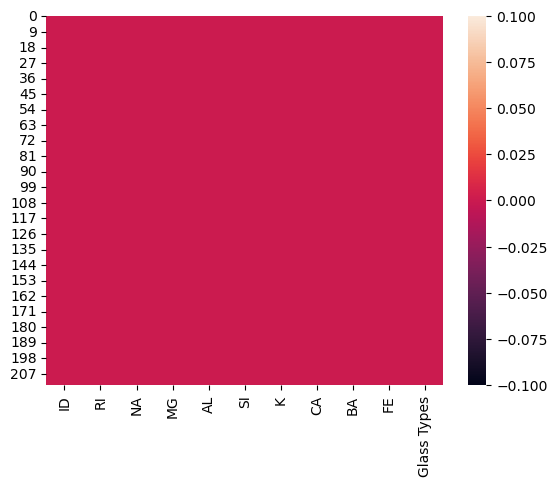

In [13]:
sns.heatmap(df.isnull())

No null value is present in the dataset.

Checking the unique keys of 'Glass Types'

In [14]:
df['Glass Types'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

There are a total of 6 unique keys in the target variable. It means that the glass quality is segregated into 6 qualities.

# Data Visualization

Univariate analysis

Creating countplot for Glass Type

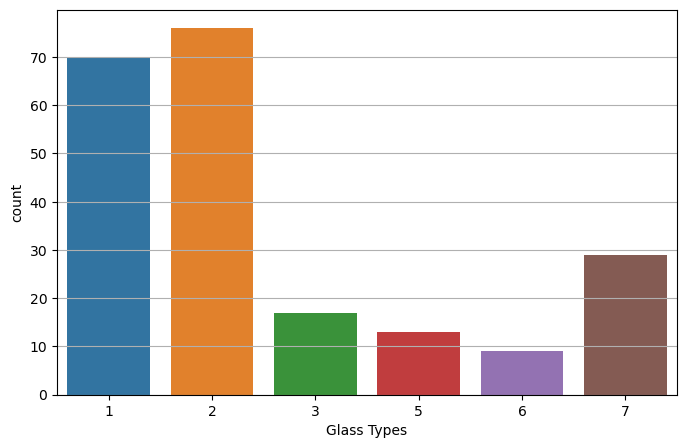

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Glass Types',data=df)
plt.grid(axis='y')

Glass type 1,2 are present on the dataset in high volumes. Class 3,5,6 are in very low volumes. Hence, it can be observed that the dataset is imbalanced.

Creating histplot to check the distribution and skewness in the continuous features

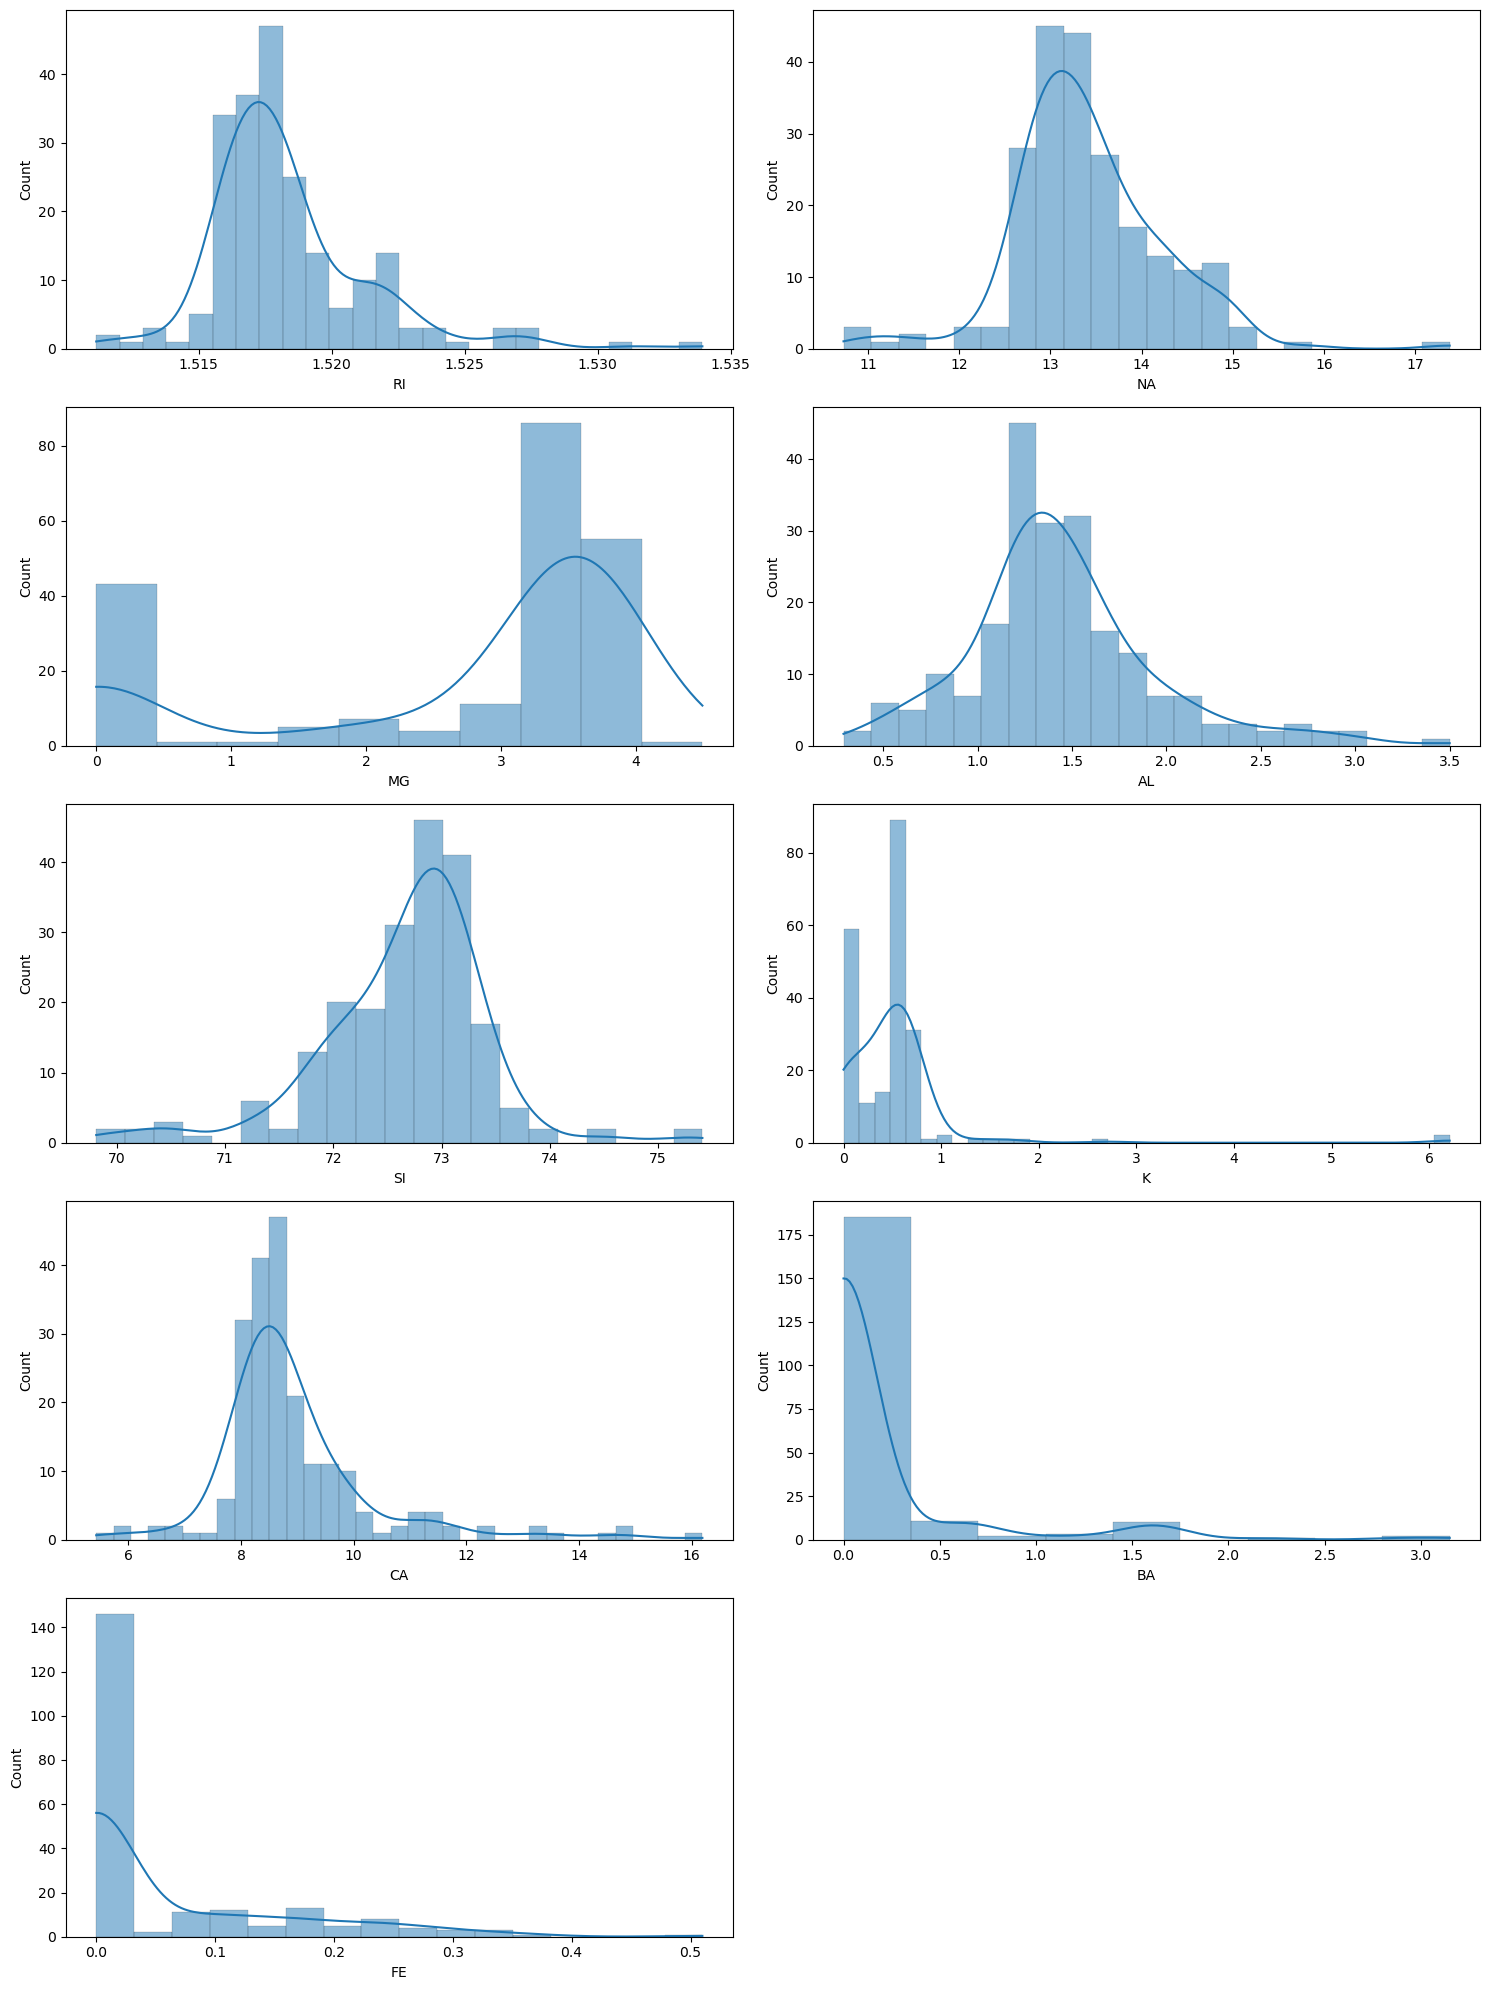

In [16]:
plt.figure(figsize=(15,20))
index=1
for feature in df.columns:
    if index<=9 and feature not in ['ID','Glass Types']:
        plt.subplot(5,2,index)
        sns.histplot(x=feature,kde=True,data=df,linewidth=.1)
        plt.xlabel(feature)
        index+=1
plt.tight_layout()

Creating kdeplot to check the distribution and skewness in the continuous features

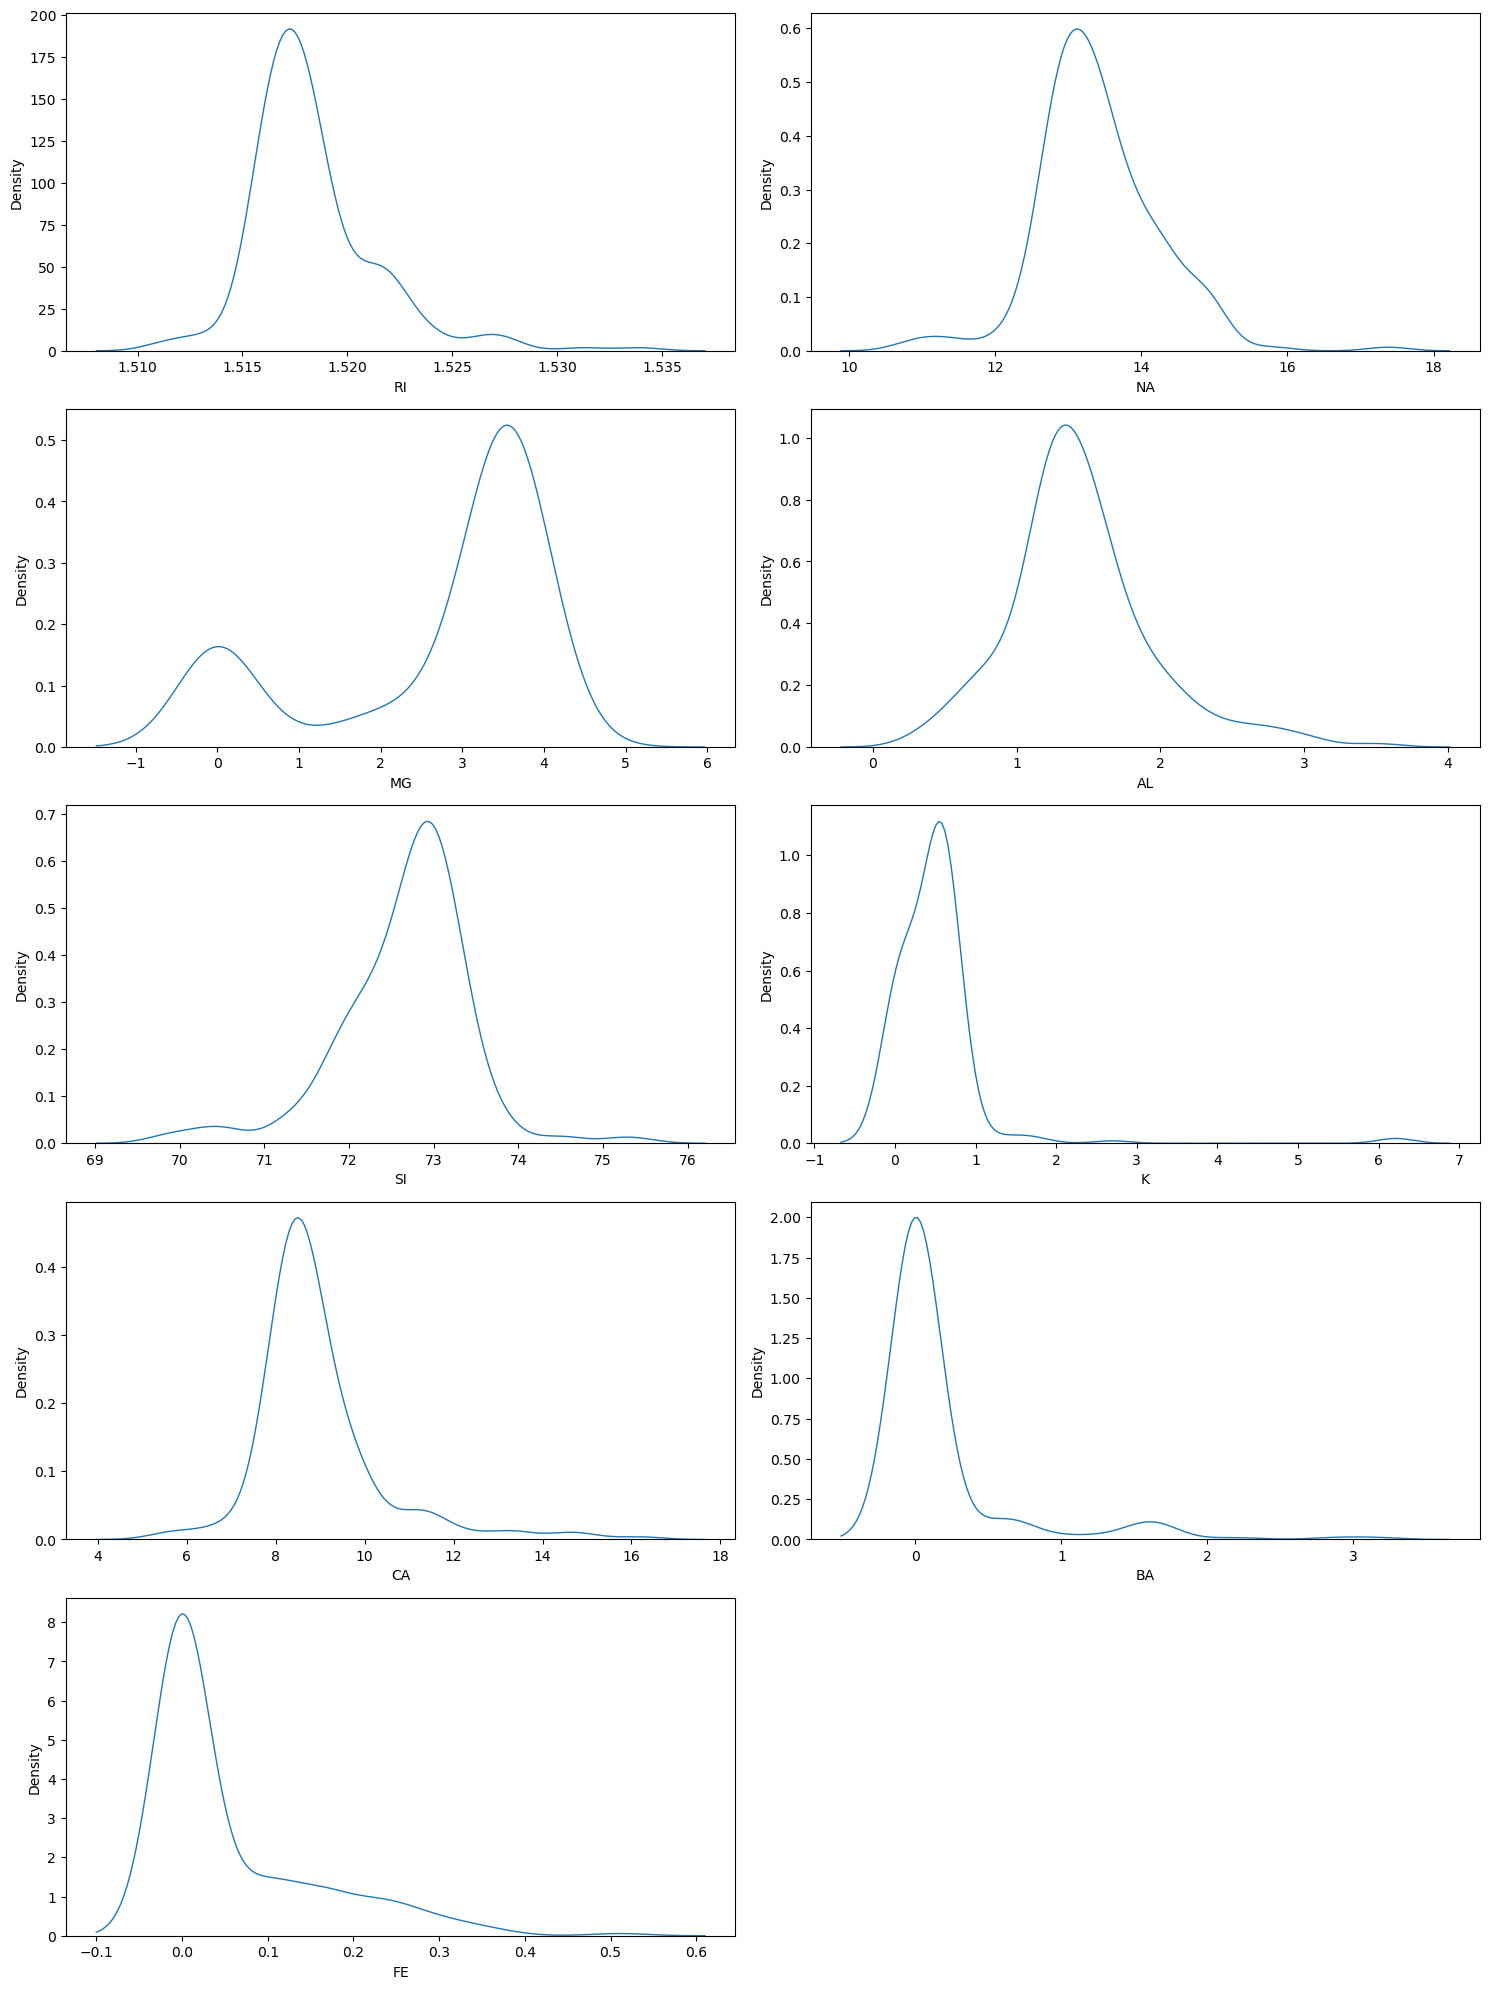

In [17]:
plt.figure(figsize=(15,20))
index=1
for feature in df.columns:
    if index<=9 and feature not in ['ID','Glass Types']:
        plt.subplot(5,2,index)
        sns.kdeplot(x=feature,data=df,linewidth=1)
        plt.xlabel(feature)
        index+=1
plt.tight_layout()

1. Features like 'Na', 'Al' and 'Si' looks normal distribution. 
2. Feature 'Ri','K','Ca','Ba' and 'Fe' are right skewed.
3. Featur 'Mg' looks left skewed.

Further analysis required to check for skewness. 

Bivariate analysis

Creating a barplot between the continuous features and target

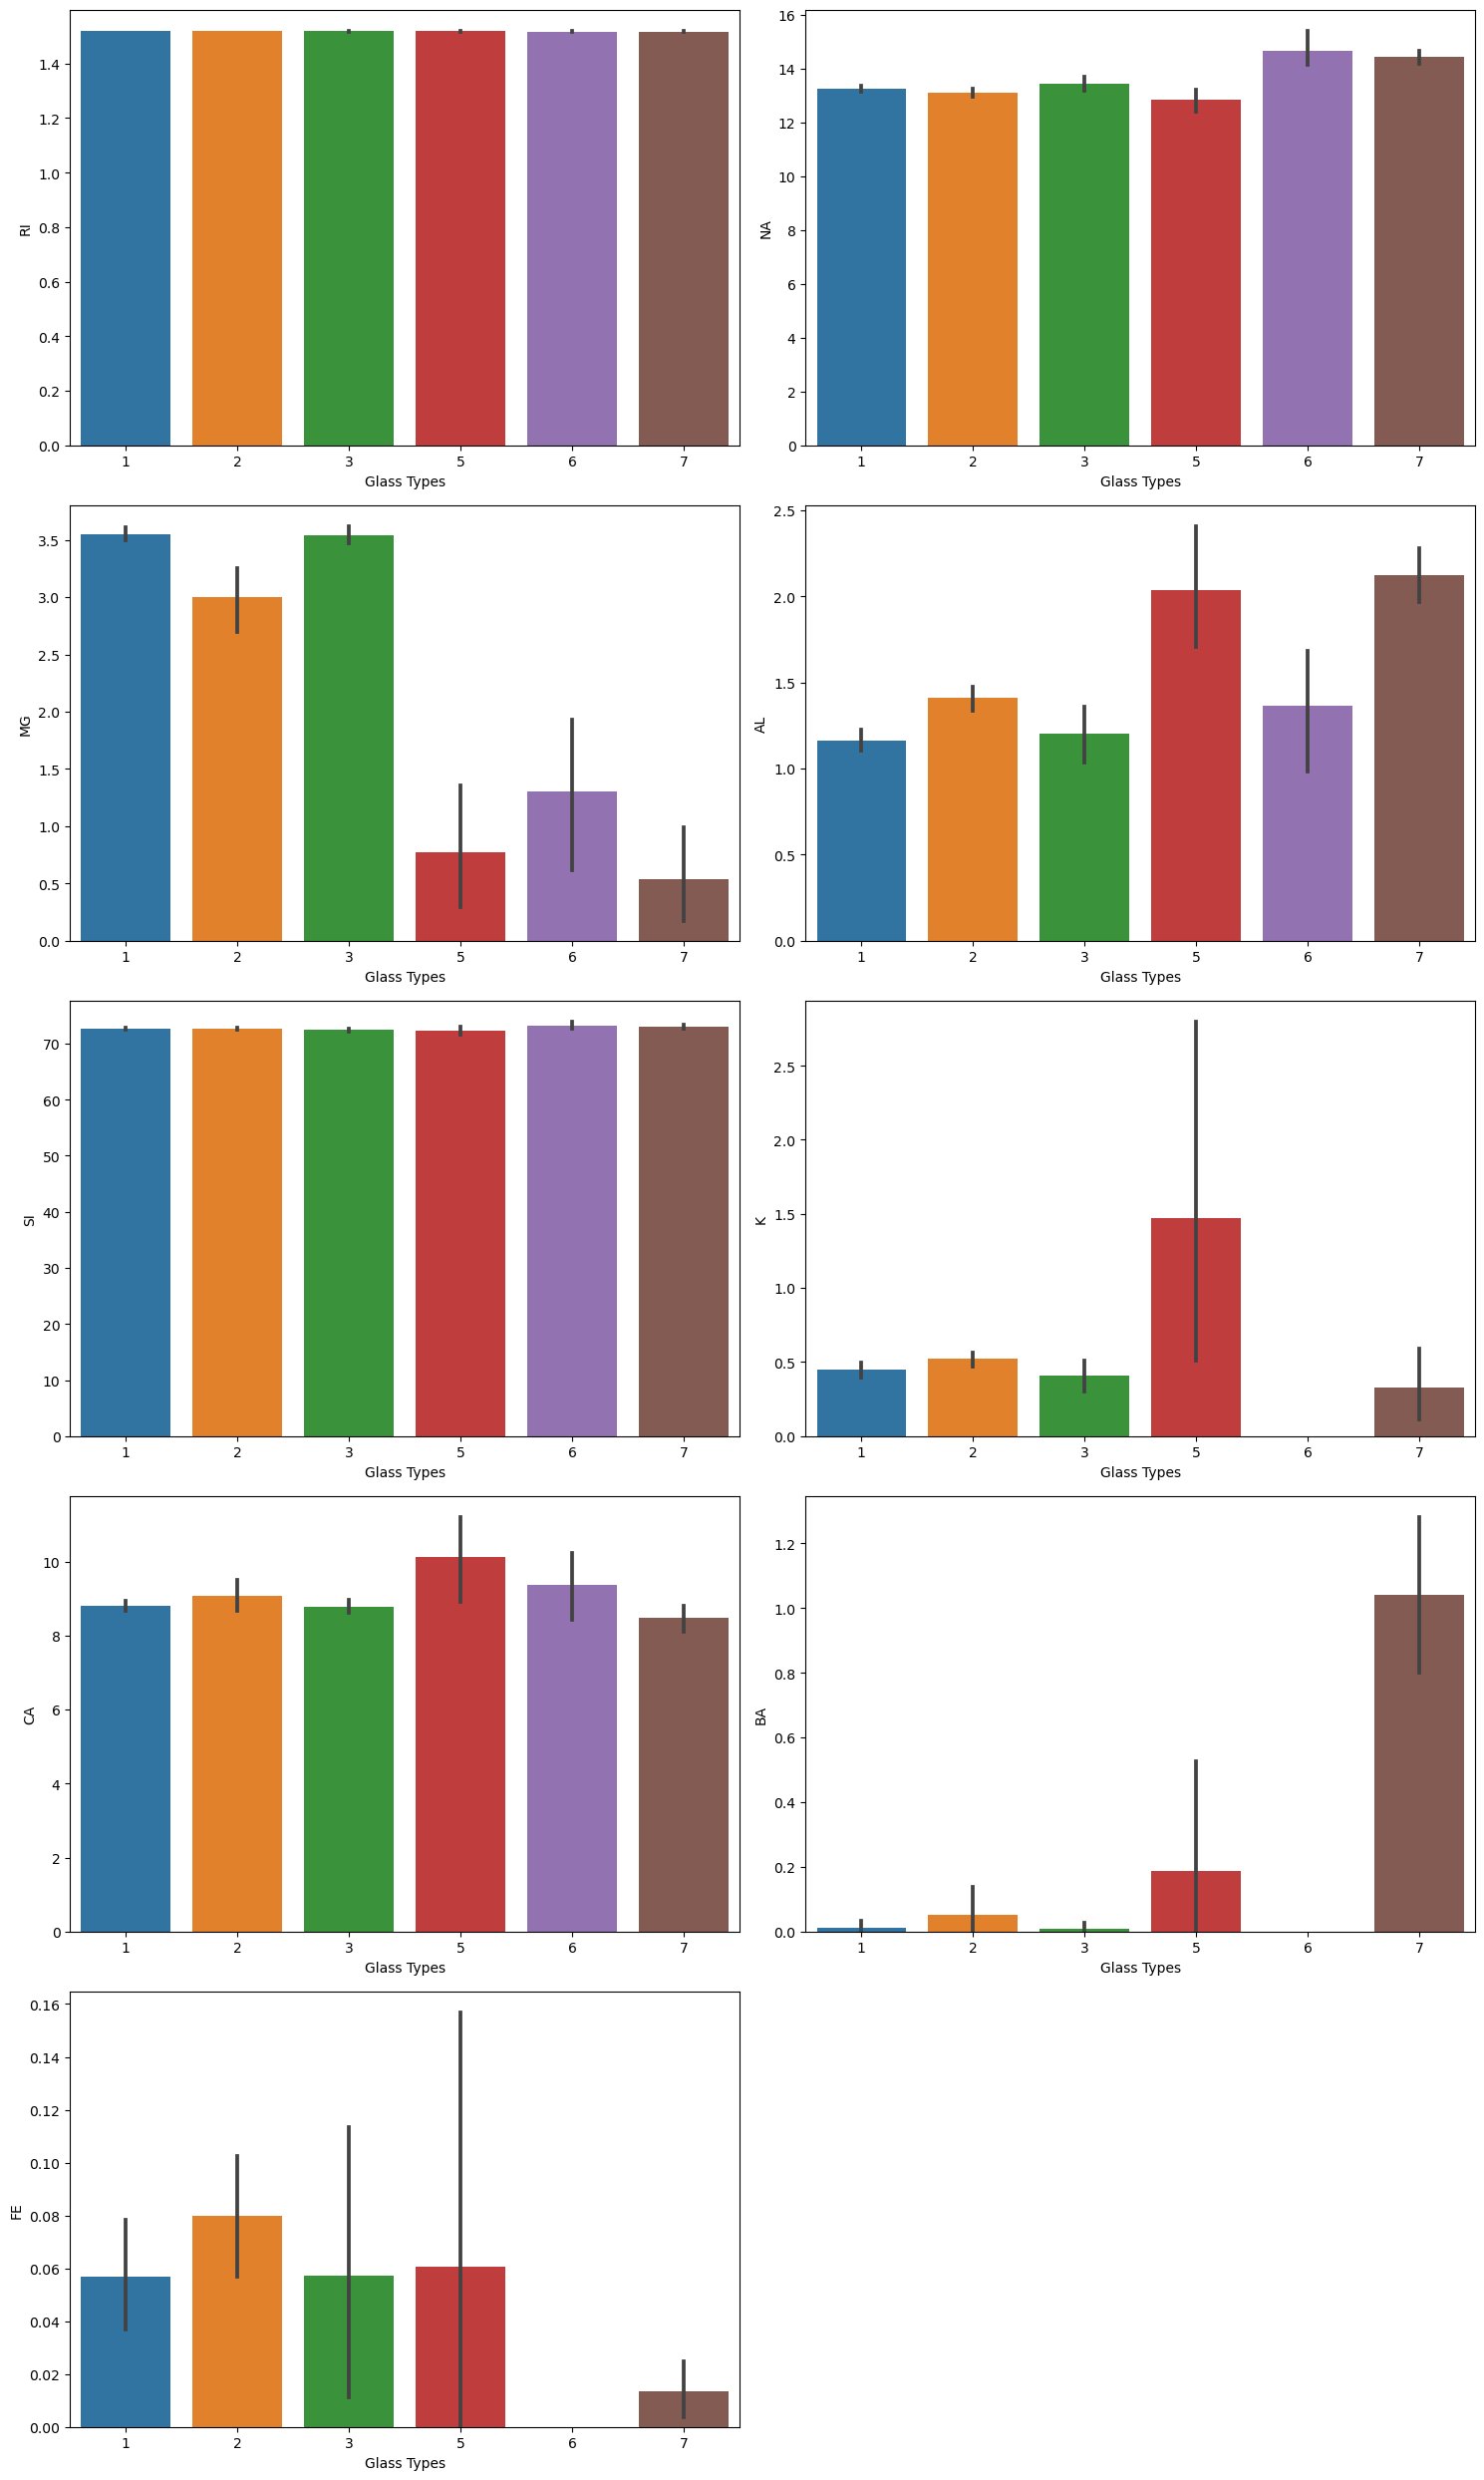

In [18]:
plt.figure(figsize=(15,25))
index=1
for feature in df.columns:
    if index<=9 and feature not in ['ID','Glass Types']:
        plt.subplot(5,2,index)
        sns.barplot(x='Glass Types',y=feature,data=df)
        plt.xlabel('Glass Types')
        plt.ylabel(feature)
        index+=1
plt.tight_layout()

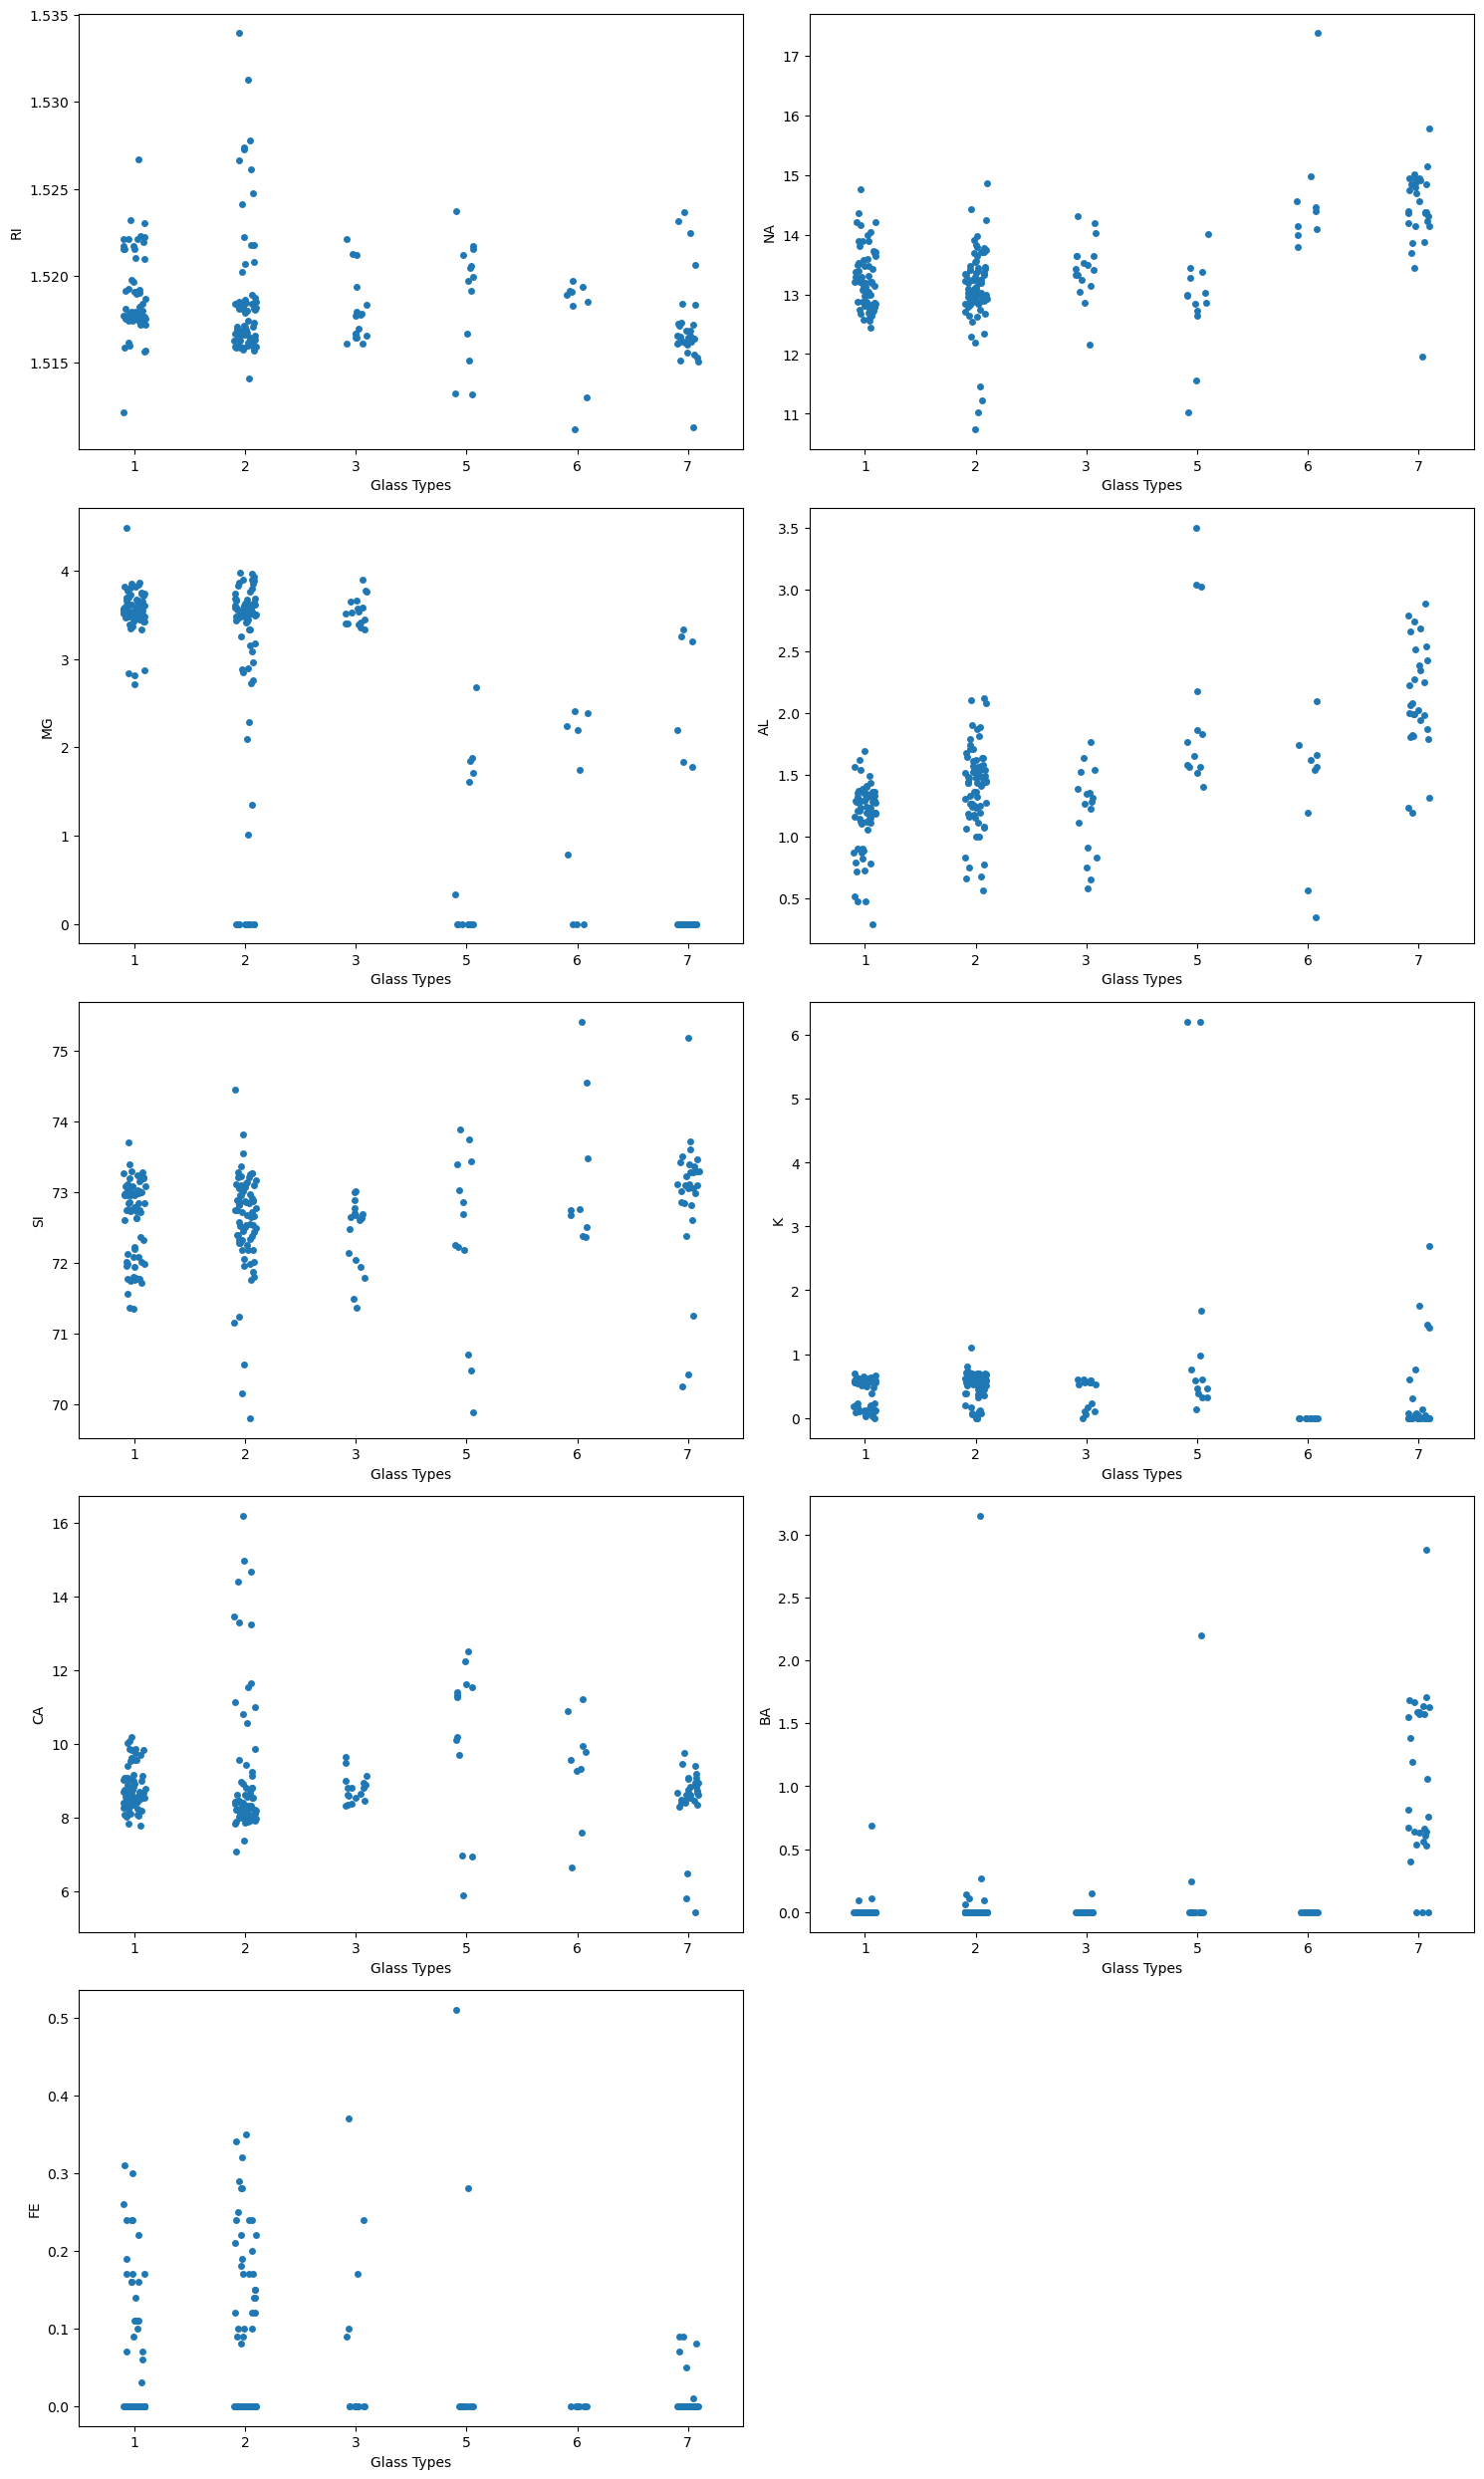

In [19]:
plt.figure(figsize=(15,25))
index=1
for feature in df.columns:
    if index<=9 and feature not in ['ID','Glass Types']:
        plt.subplot(5,2,index)
        sns.stripplot(x='Glass Types',y=feature,data=df)
        plt.xlabel('Glass Types')
        plt.ylabel(feature)
        index+=1
plt.tight_layout()

By visualizing the barplot we can observe that 

1. The level of RI and SI is almost same through out glass types.
2. Sodium (NA) and Calcium (CA) level in glass types varies a little.
3. The amount of MG in very high in window glass i.e Glass types 1,2,3. Glass types 5,6,7 has lower level of MG.
4. Glass type 5,7 has higher level of Aluminium (Al) than type 1,2,3,6.
5. The level of Barium (BA) very high in Glass type 7 compared to others. Glass type 6 has no BA present.
6. The amount of Iron (Fe) in glass type 1,2,3,5 is higher than 7. Type 6 glass has no FE present.

Multivariate analysis

Performing multivariate analysis using pairplot

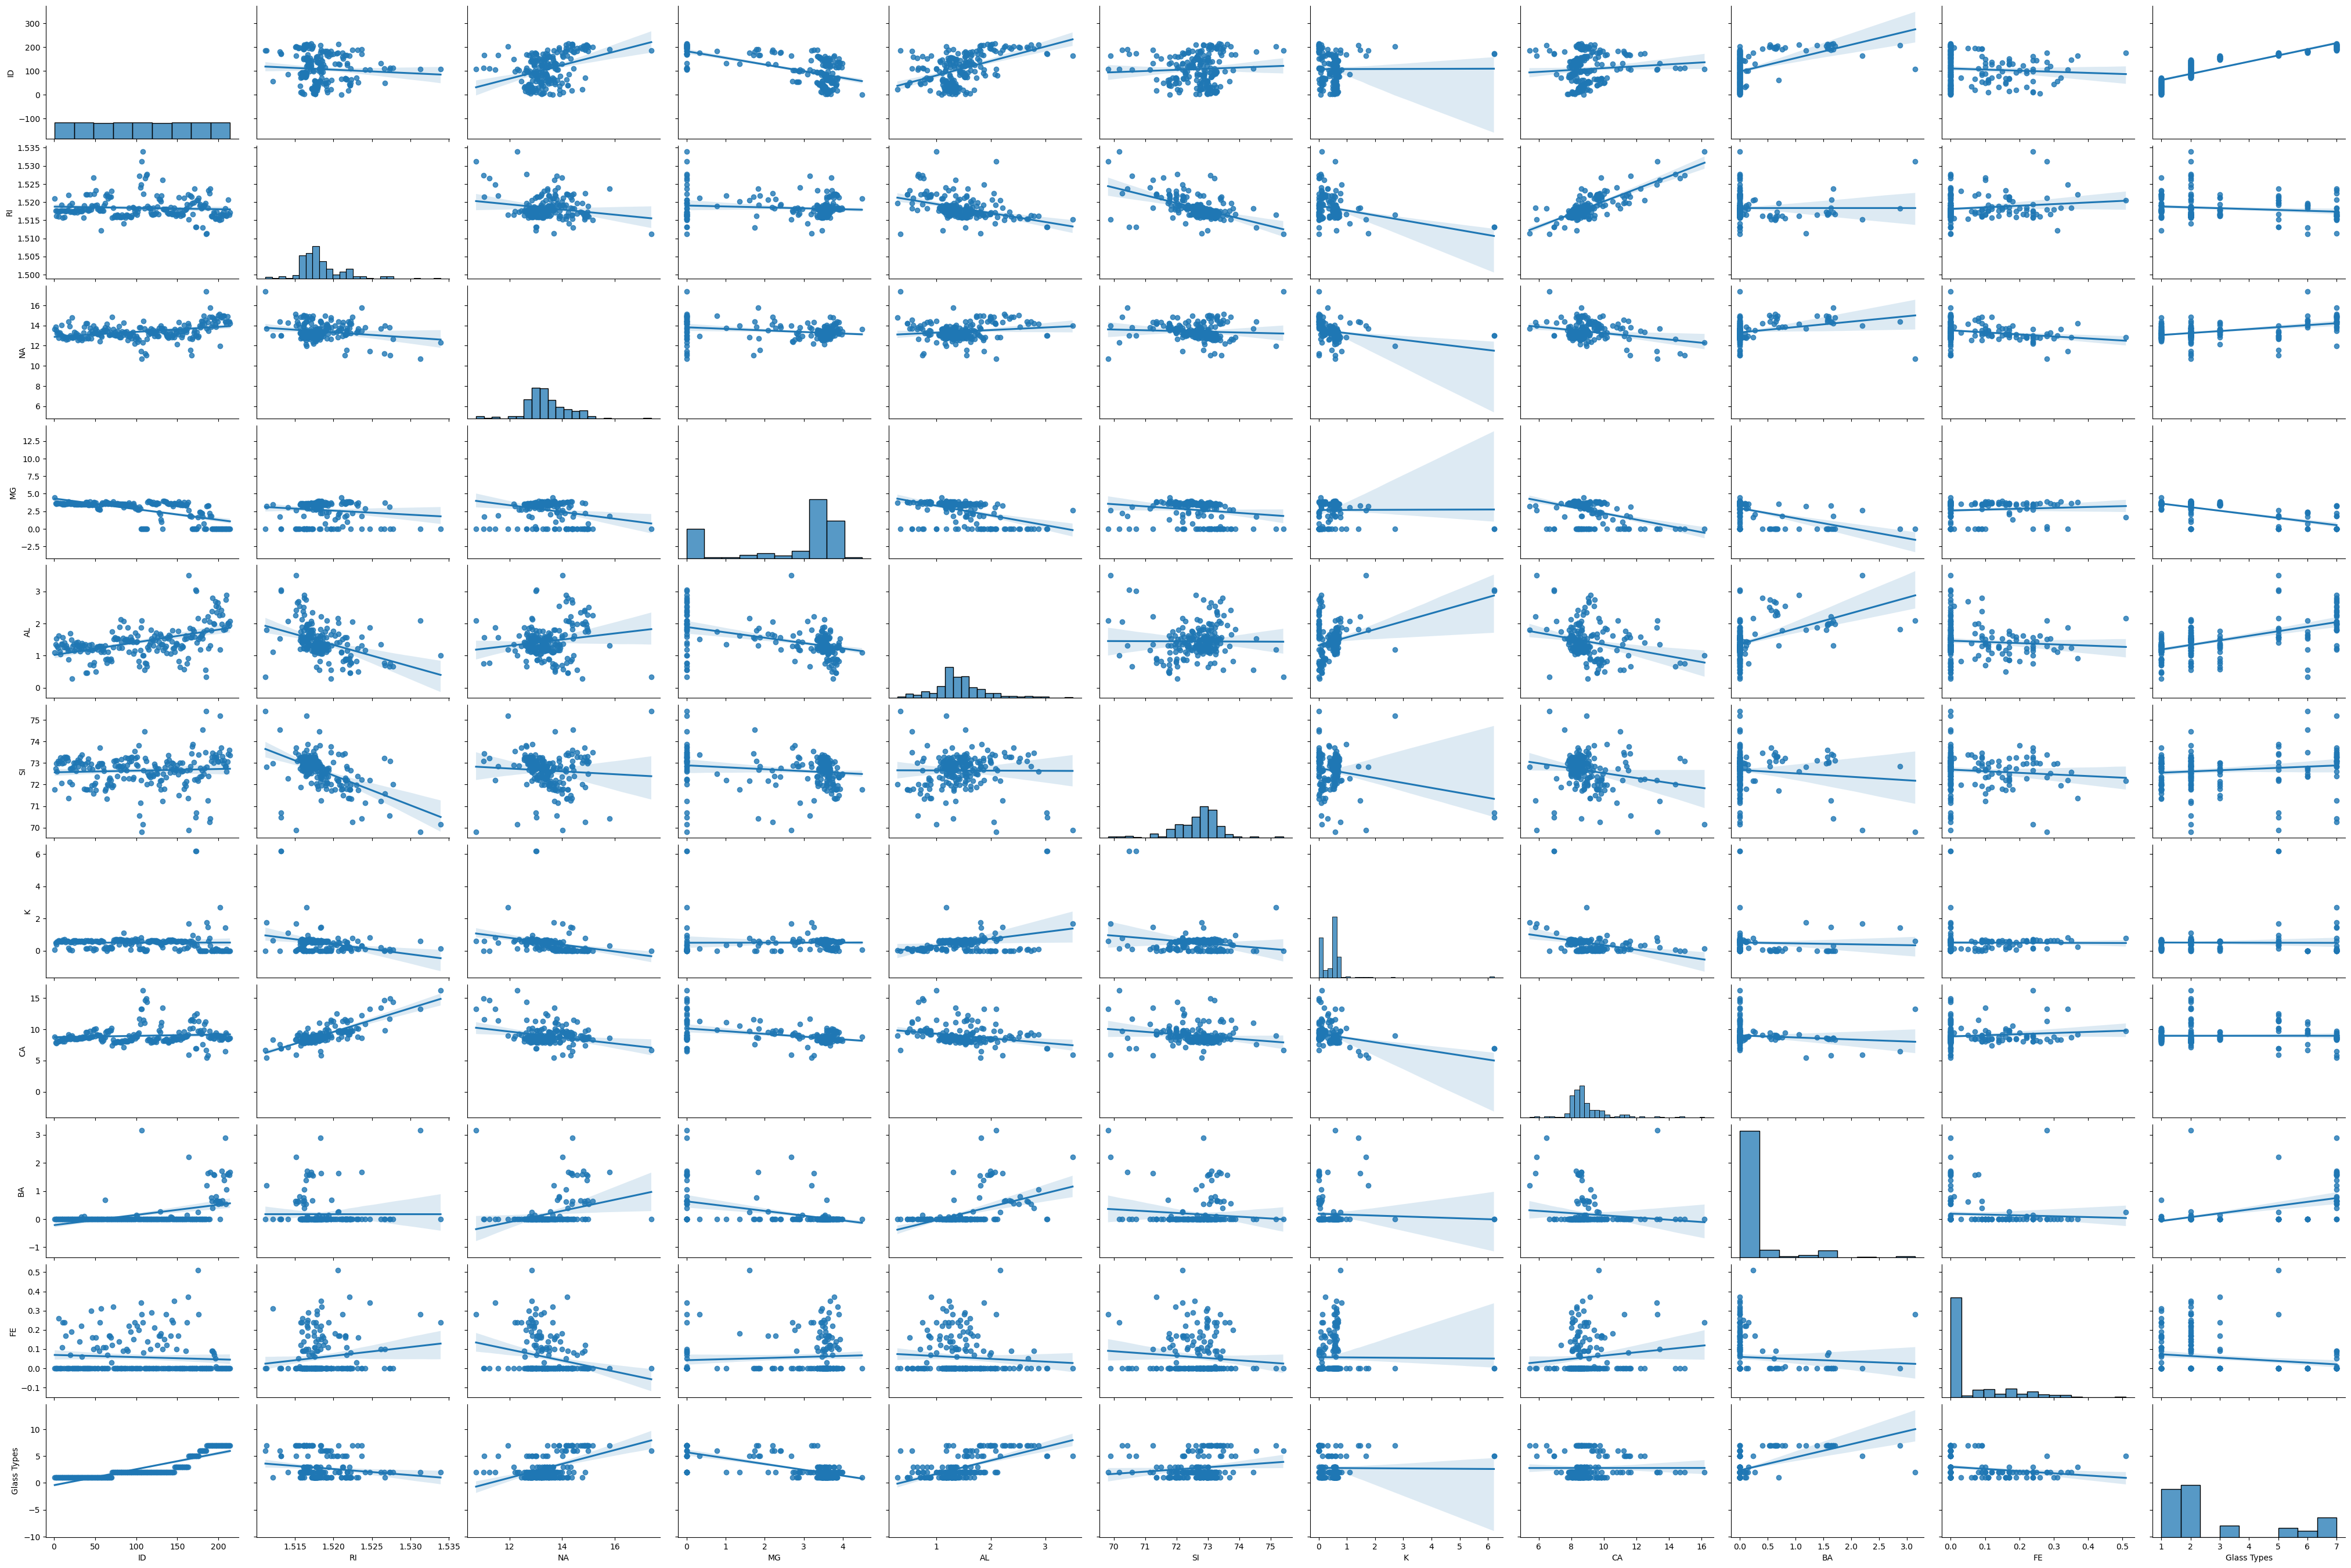

In [20]:
sns.pairplot(df,kind='reg',aspect=1.5)

# Analyzing descriptive statistics and correlation

Checking the mean, median, std. dev. using describe

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
NA,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
MG,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
AL,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
SI,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
CA,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
BA,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
FE,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


1. RI, NA, SI and CA has almost similar mean and median. Hence not much skewness can be observed.
2. MG has median greater than mean. Hence the column is left skewed.
3. In AL, BA and FE mean is greater than median. Hence the columns are right skewed.
4. Presence of outliers can be observed in AL, K, CA, BA and FE. Further analysis required.
5. All the columns has a similar count of 194.

Checking the correlation using heatmap

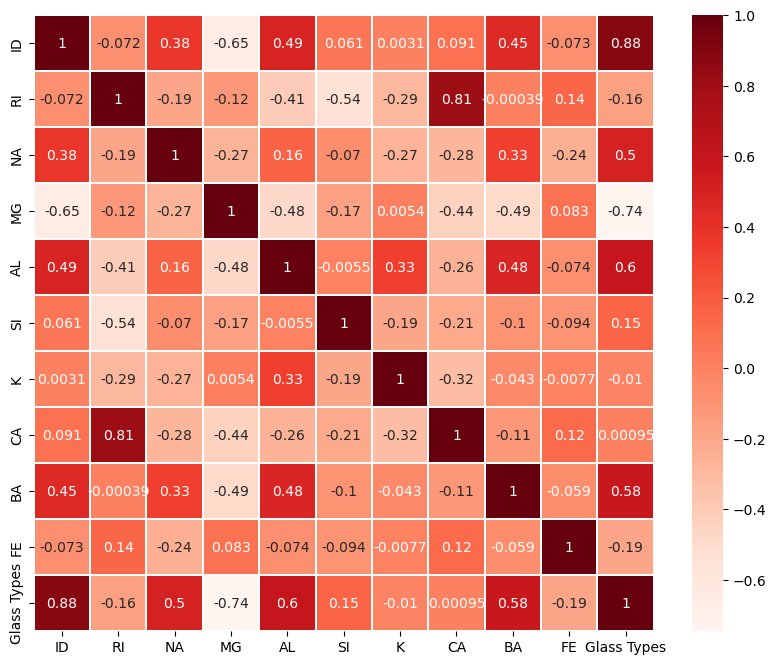

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),fmt='.2g',annot=True,linewidth=.2,cmap='Reds')
plt.show()

1. The target is strong negatively correlated with MG.
2. RI, FE and K are weak negatively correlation with Target.
3. AL, NA and BA are moderately positve correlated.
4. CA has no correlation with Target

# Outliers Check

Extracting continuous features to check outliers 

In [23]:
num_features=[feature for feature in df.columns if feature not in ['ID','Glass Types']]
num_features

['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE']

Visualizing outliers using boxplot

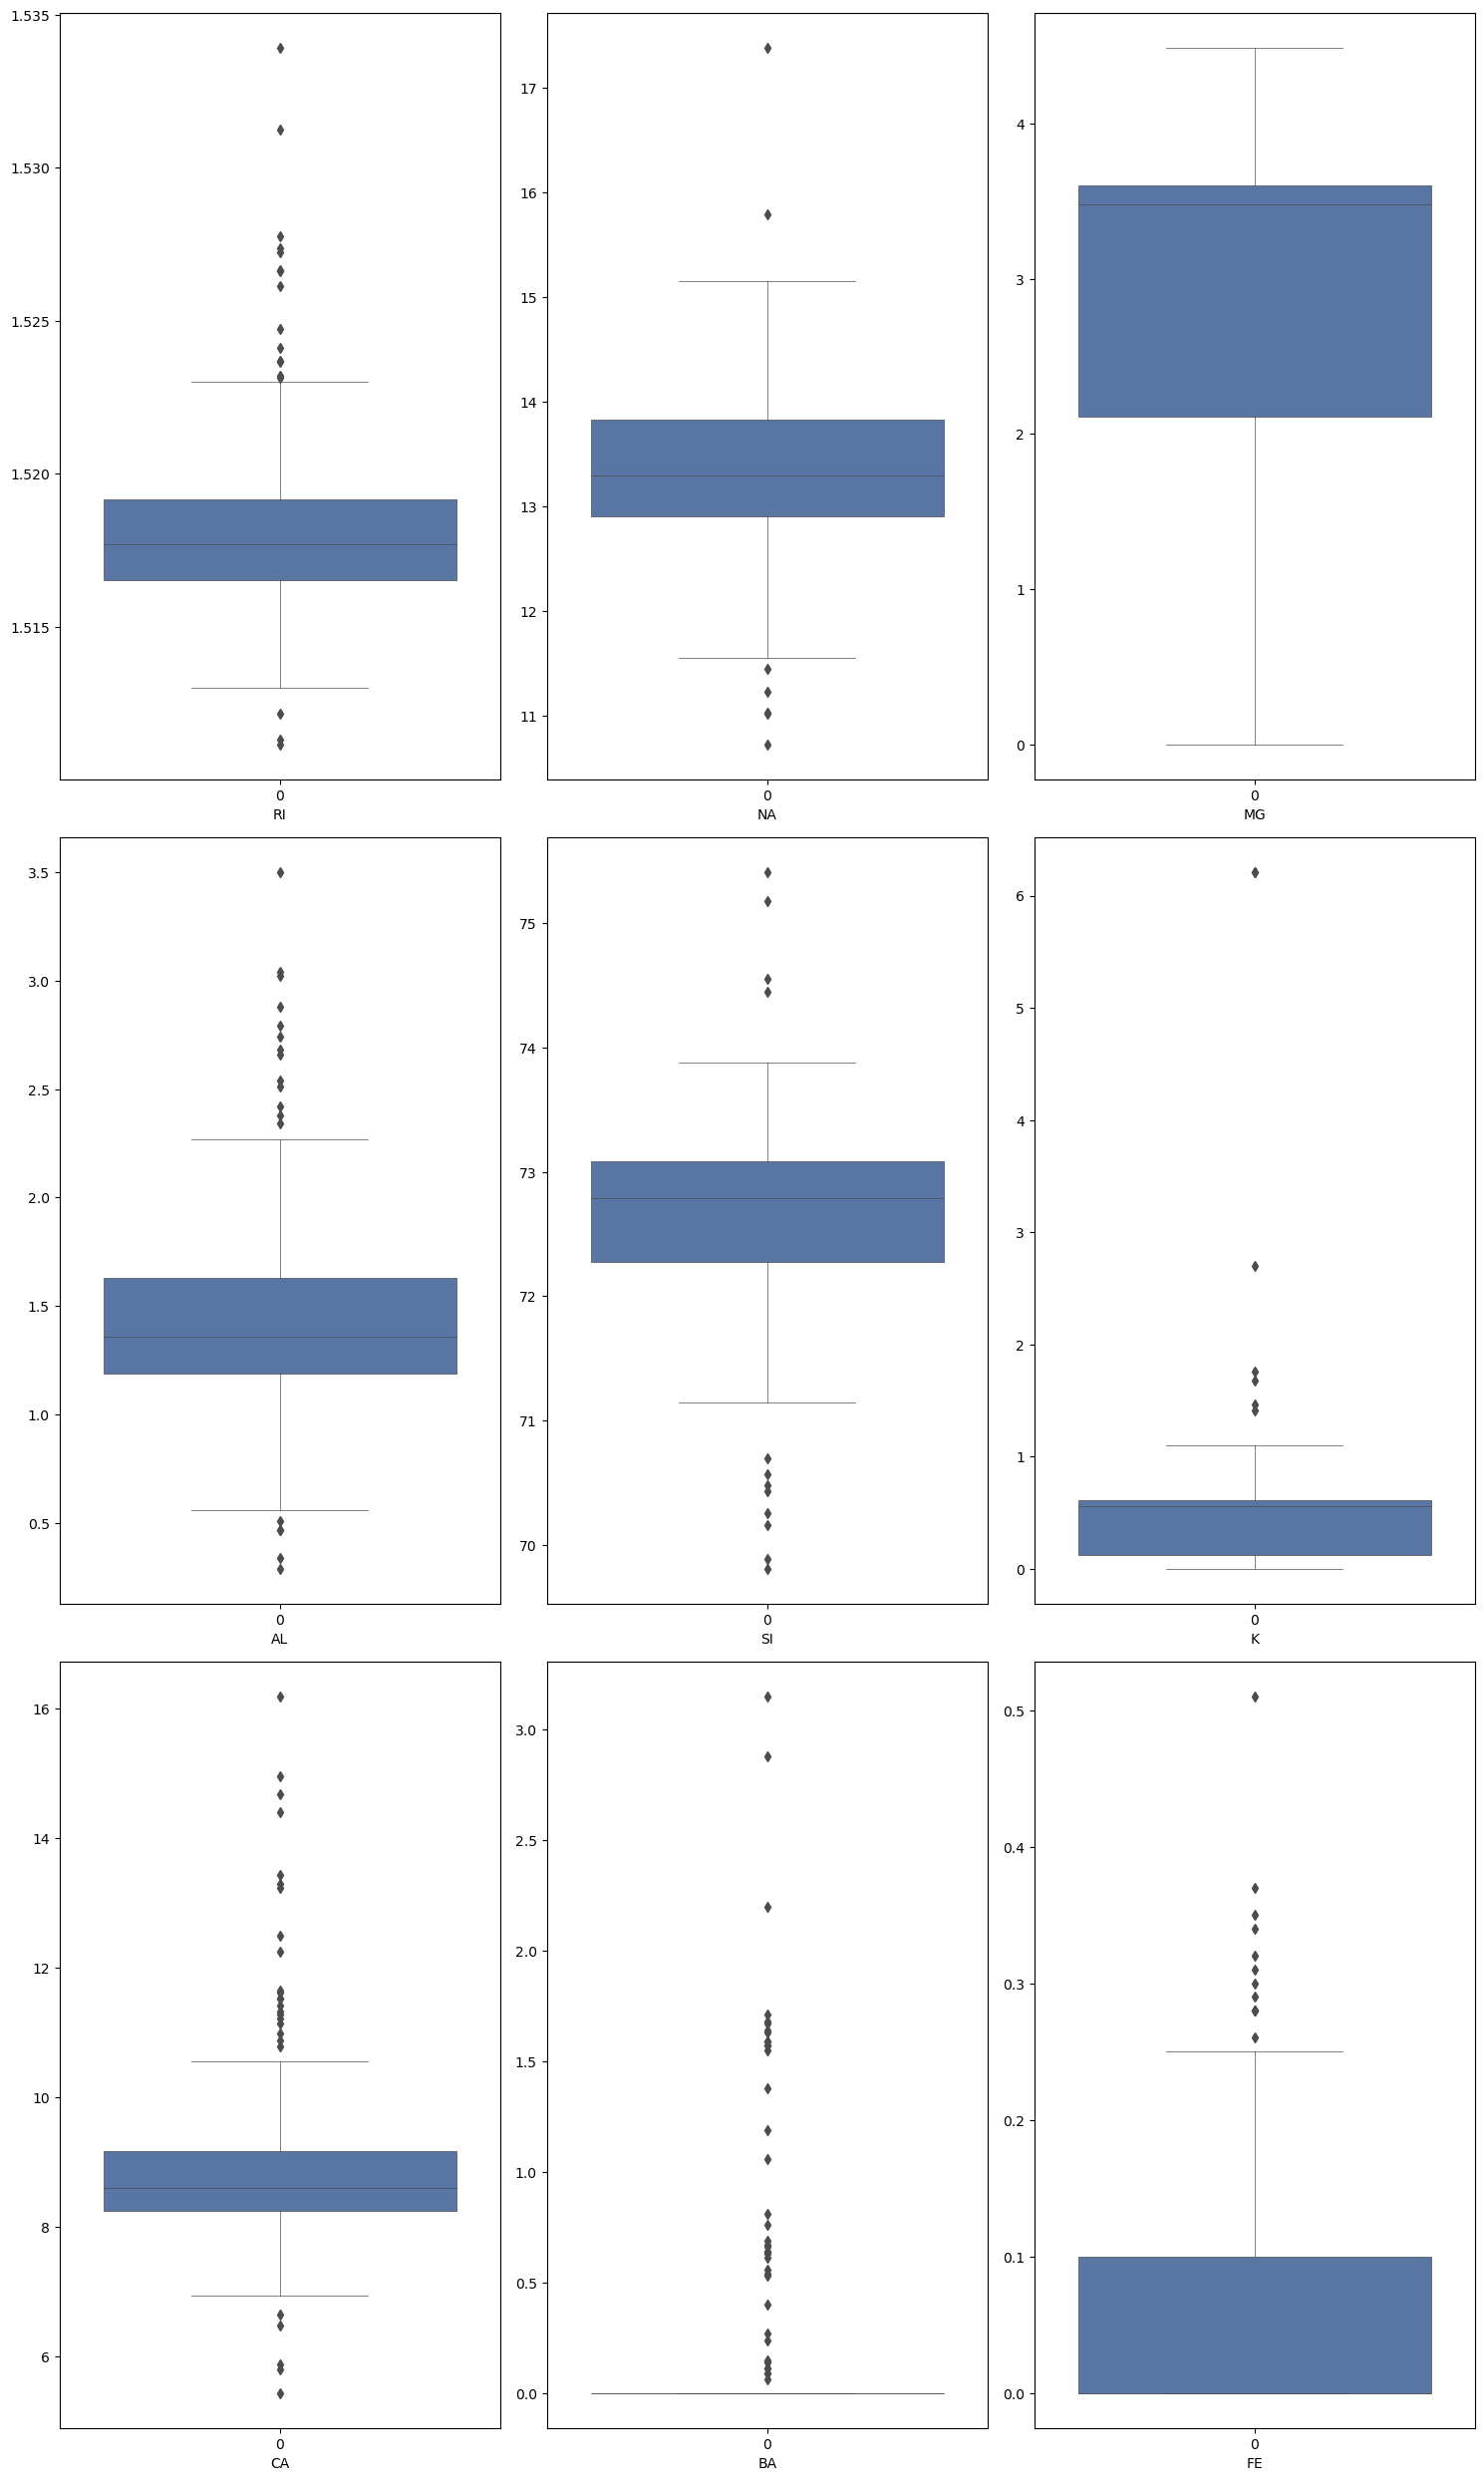

In [24]:
plt.figure(figsize=(15,25))
index=1
for feature in num_features:
    if index<=len(num_features):
        plt.subplot(3,3,index)
        sns.boxplot(df[feature],palette='deep',linewidth=.5)
        plt.xlabel(feature)
        index+=1
        
plt.tight_layout()

Presence of outliers are seen through visualization. Need further analysis 

Checking outlier using zscore

In [25]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[num_features]))
    print(np.where(z_score>3))
    return z_score

Checking for zscore values higher than 3

In [26]:
z_score=outliers_detection(df)
z_score

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


,RI,NA,MG,AL,SI,K,CA,BA,FE
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


Removing outliers in the dataset

In [27]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [28]:
df_clean=removing_outliers(z_score,df)

In [29]:
df_clean.shape

(194, 11)

Calculating the total data loss

In [30]:
total_data_loss=df.shape[0]-df_clean.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 20


Calculating the percentage of data loss

In [31]:
total_data=df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 9.35%


Assigning the outlier free dataset to df

In [32]:
df=df_clean

Checking the shape

In [33]:
df.shape

(194, 11)

# Skewness check

Checking the skewness of all the numerical features

In [34]:
df[num_features].skew()

RI    0.952733
NA    0.371482
MG   -1.528849
AL    0.658259
SI   -0.425450
K     0.303175
CA    1.077962
BA    3.188587
FE    1.486479
dtype: float64

There are skewness observed in RI, MG,CA,BA and FE. MG is left skewed. Almost all the columns has zero as data. 

Checking columns which has 0 as data

In [35]:
columns_with_zeros = (df[num_features] == 0.0).any()
columns_with_zeros

RI    False
NA    False
MG     True
AL    False
SI    False
K      True
CA    False
BA     True
FE     True
dtype: bool

MG, K, BA and FE contains 0 as data. Hence we need to add a small amount of value before removing skewness whcile performing certail operation like np.log

Removing skewness in RI using boxcox transformation

In [36]:
skewed_RI,_=boxcox(df['RI'])
data=pd.DataFrame()
data['RI']=skewed_RI
data['RI'].skew()

0

Assigning skewed_RI value to df [ 'RI' ]

In [37]:
df['RI']=skewed_RI

In [38]:
# Verifying skewness reduction
df[num_features].skew()

RI    0.000000
NA    0.371482
MG   -1.528849
AL    0.658259
SI   -0.425450
K     0.303175
CA    1.077962
BA    3.188587
FE    1.486479
dtype: float64

Removing skewness in CA using log transformation

In [39]:
skewed_CA=np.log(df['CA'])
skewed_CA.skew()

0.3365555807704563

Assigning skewed_CA value to df [ 'CA' ]

In [40]:
df['CA']=skewed_CA

In [41]:
# Verifying skewness reduction
df[num_features].skew()

RI    0.000000
NA    0.371482
MG   -1.528849
AL    0.658259
SI   -0.425450
K     0.303175
CA    0.336556
BA    3.188587
FE    1.486479
dtype: float64

Removing skewness in FE using log transformation

In [42]:
skewed_fe=np.log(df['FE']+.0001)
skewed_fe.skew()

0.7836259244047474

Assigning skewed_FE value to df [ 'FE' ]

In [43]:
df['FE']=skewed_fe

In [44]:
# Verifying skewness reduction
df[num_features].skew()

RI    0.000000
NA    0.371482
MG   -1.528849
AL    0.658259
SI   -0.425450
K     0.303175
CA    0.336556
BA    3.188587
FE    0.783626
dtype: float64

Removing skewness in BA using log transformation

In [45]:
skewed_BA=np.log(df['BA']+0.0001)
skewed_BA.skew()

1.9326831812814675

Assigning skewed_BA value to df [ 'BA' ]

In [46]:
df['BA']=skewed_BA

In [47]:
# Verifying skewness reduction
df[num_features].skew()

RI    0.000000
NA    0.371482
MG   -1.528849
AL    0.658259
SI   -0.425450
K     0.303175
CA    0.336556
BA    1.932683
FE    0.783626
dtype: float64

Removing skewness in MG using Boxcox

In [48]:
skewed_MG,_=boxcox(df['MG']+1)
data['MG']=skewed_MG
data['MG'].skew()

-1.0260089185996726

Assigning skewed_MG value to df [ 'MG' ]

In [49]:
df['MG']=skewed_MG

In [50]:
# Verifying skewness reduction
df[num_features].skew()

RI    0.000000
NA    0.371482
MG   -1.026009
AL    0.658259
SI   -0.425450
K     0.303175
CA    0.336556
BA    1.932683
FE    0.783626
dtype: float64

Skewness in some columns are present moderately in MG and BA. Applying np.exp although reduces the skewness to -.38 in MG but it increses the data exponentially. Hence boxcox method has been applied 

# Feature Selection

The feature ID is used as an indexing and has no relation with target variable. Hence can be dropped from the dataset.

Dropping ID column

In [51]:
df.drop('ID',axis=1,inplace=True)

In [52]:
# Verifying the dataset
df

,RI,NA,MG,AL,SI,K,CA,BA,FE,Glass Types
0,0.007015,13.64,46.729959,1.10,71.78,0.06,2.169054,-9.210340,-9.21034,1
1,0.007015,13.89,27.920871,1.36,72.73,0.48,2.057963,-9.210340,-9.21034,1
2,0.007015,13.53,27.043850,1.54,72.99,0.39,2.051556,-9.210340,-9.21034,1
3,0.007015,13.21,29.545347,1.29,72.61,0.57,2.106570,-9.210340,-9.21034,1
4,0.007015,13.27,28.276750,1.24,73.08,0.55,2.088153,-9.210340,-9.21034,1
...,...,...,...,...,...,...,...,...,...,...
208,0.007015,14.37,0.000000,2.74,72.85,0.00,2.246015,-0.616001,-9.21034,7
209,0.007015,14.14,0.000000,2.88,72.61,0.08,2.217027,0.058363,-9.21034,7
210,0.007015,14.92,0.000000,1.99,73.06,0.00,2.128232,0.463797,-9.21034,7
211,0.007015,14.36,0.000000,2.02,73.42,0.00,2.132982,0.494757,-9.21034,7


Separating dependent and independent variables

In [53]:
x=df.drop('Glass Types',axis=1)
y=df['Glass Types']

# Feature Scaling

In [54]:
def scaling_stdScaler(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [55]:
x=scaling_stdScaler(x)

Standard scaling will transfor the values of the dataset into same scale. It will help in improving the model performance and ensure that the data is in the same scale.

In [56]:
x

,RI,NA,MG,AL,SI,K,CA,BA,FE
0,1.734723e-18,0.332127,2.295067,-0.729105,-1.612464,-1.319609,-0.023335,-0.432617,-0.690023
1,1.734723e-18,0.704398,0.587338,-0.141722,0.016082,0.172091,-1.048197,-0.432617,-0.690023
2,1.734723e-18,0.168328,0.507711,0.264928,0.461790,-0.147559,-1.107296,-0.432617,-0.690023
3,1.734723e-18,-0.308179,0.734829,-0.299864,-0.189629,0.491741,-0.599771,-0.432617,-0.690023
4,1.734723e-18,-0.218834,0.619650,-0.412822,0.616073,0.420708,-0.769673,-0.432617,-0.690023
...,...,...,...,...,...,...,...,...,...
189,1.734723e-18,1.419158,-1.947674,2.975928,0.221793,-1.532708,0.686662,2.280565,-0.690023
190,1.734723e-18,1.076668,-1.947674,3.292211,-0.189629,-1.248575,0.419240,2.493458,-0.690023
191,1.734723e-18,2.238153,-1.947674,1.281553,0.581788,-1.532708,-0.399935,2.621451,-0.690023
192,1.734723e-18,1.404267,-1.947674,1.349328,1.198921,-1.532708,-0.356108,2.631225,-0.690023


# Variance Inflation Factor

In [57]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factors']=[VIF(x.values,i) for i in range(x.shape[1])]
    
    return vif

In [58]:
vif_calc(x)

,Features,VIF Factors
0,RI,1.000000
1,NA,6.799378
2,MG,12.957876
3,AL,3.537501
4,SI,4.235058
5,K,5.000238
6,CA,10.352060
7,BA,2.551584
8,FE,1.055006


MG and CA has high correlation with other features. Let drop the column MG can recheck for VIF

In [59]:
x.drop('MG',axis=1,inplace=True)

In [60]:
vif_calc(x)

,Features,VIF Factors
0,RI,1.000000
1,NA,3.119420
2,AL,1.795998
3,SI,1.476865
4,K,3.302276
5,CA,2.004151
6,BA,2.080041
7,FE,1.050496


After dropping the MG feature the multicollinearity issue has been resolved.

Checking for imbalanced dataset

In [61]:
y.value_counts()

Glass Types
1    70
2    68
7    23
3    16
5     9
6     8
Name: count, dtype: int64

We can observed that the target has imbalanced data. Hence need to perform oversampling using SMOTE

Oversampling using SMOTE

In [62]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [63]:
y.value_counts()

Glass Types
1    70
2    70
3    70
5    70
6    70
7    70
Name: count, dtype: int64

Now, the dataset has been balanced and ready to perform Modelling.

# Modelling

Evaluating the best randon state using SVC

In [64]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        svc=SVC()
        svc.fit(x_train,y_train)
        pred=svc.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [65]:
random_state_cal(x,y)

R2 Score :0.8809523809523809 Random state :44


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=.30, random_state=44)

Logistic Regression

In [67]:
def logistic_regression(x_train,x_test,y_train,y_test):
    
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((accuracy_score(y_test,lr_pred))*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [68]:
lr_pred, acc_lr = logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 83.333333% 
[[10  5  2  0  0  0]
 [ 3 11  3  1  0  0]
 [ 2  3 14  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  2  0  0  0 25]]
              precision    recall  f1-score   support

           1       0.67      0.59      0.62        17
           2       0.52      0.61      0.56        18
           3       0.74      0.74      0.74        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       1.00      0.93      0.96        27

    accuracy                           0.83       126
   macro avg       0.81      0.81      0.81       126
weighted avg       0.84      0.83      0.84       126



Support Vector Classifier

In [69]:
def support_vector(x_train,x_test,y_train,y_test):
    
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    
    acc_svc=accuracy_score(y_test,svc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,svc_pred))*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [70]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 88.095238% 
[[15  0  2  0  0  0]
 [ 2 12  3  1  0  0]
 [ 3  1 15  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  3  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        17
           2       0.75      0.67      0.71        18
           3       0.75      0.79      0.77        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       1.00      0.89      0.94        27

    accuracy                           0.88       126
   macro avg       0.87      0.87      0.87       126
weighted avg       0.89      0.88      0.88       126



Random Forest Classifier

In [71]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [72]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 88.095238% 
[[13  3  1  0  0  0]
 [ 3 12  2  1  0  0]
 [ 3  1 15  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  1  0  0  0 26]]
              precision    recall  f1-score   support

           1       0.68      0.76      0.72        17
           2       0.71      0.67      0.69        18
           3       0.83      0.79      0.81        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       1.00      0.96      0.98        27

    accuracy                           0.88       126
   macro avg       0.86      0.86      0.86       126
weighted avg       0.88      0.88      0.88       126



Adaboost Classifier

In [73]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [74]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 38.888889% 
[[ 0  4 13  0  0  0]
 [ 0  9  8  0  0  1]
 [ 0  2 17  0  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0  0  0 20  0]
 [24  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.23      0.50      0.31        18
           3       0.45      0.89      0.60        19
           5       0.00      0.00      0.00        25
           6       1.00      1.00      1.00        20
           7       0.75      0.11      0.19        27

    accuracy                           0.39       126
   macro avg       0.40      0.42      0.35       126
weighted avg       0.42      0.39      0.33       126



Gradient Boosting Classifier

In [75]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [76]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 84.920635% 
[[10  5  1  1  0  0]
 [ 4 12  1  0  0  1]
 [ 3  2 14  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  1  0  0  0 26]]
              precision    recall  f1-score   support

           1       0.59      0.59      0.59        17
           2       0.60      0.67      0.63        18
           3       0.88      0.74      0.80        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       0.96      0.96      0.96        27

    accuracy                           0.85       126
   macro avg       0.83      0.83      0.83       126
weighted avg       0.85      0.85      0.85       126



Bagging classifier

In [77]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [78]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 86.507937% 
[[13  4  0  0  0  0]
 [ 5 10  2  1  0  0]
 [ 3  2 14  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           1       0.62      0.76      0.68        17
           2       0.62      0.56      0.59        18
           3       0.88      0.74      0.80        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        27

    accuracy                           0.87       126
   macro avg       0.85      0.84      0.84       126
weighted avg       0.87      0.87      0.86       126



Extra tree classifier

In [79]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [80]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 89.682540% 
[[14  3  0  0  0  0]
 [ 4 12  1  1  0  0]
 [ 3  1 15  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           1       0.67      0.82      0.74        17
           2       0.75      0.67      0.71        18
           3       0.94      0.79      0.86        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        27

    accuracy                           0.90       126
   macro avg       0.89      0.88      0.88       126
weighted avg       0.90      0.90      0.90       126



Decision Tree Classifier

In [81]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using SVC is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [82]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 85.714286% 
[[12  3  0  1  0  1]
 [ 5 12  1  0  0  0]
 [ 3  3 13  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 1  0  0  0  0 26]]
              precision    recall  f1-score   support

           1       0.57      0.71      0.63        17
           2       0.67      0.67      0.67        18
           3       0.93      0.68      0.79        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       0.96      0.96      0.96        27

    accuracy                           0.86       126
   macro avg       0.85      0.84      0.84       126
weighted avg       0.87      0.86      0.86       126



KNN Classifier

In [83]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [84]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 86.507937% 
[[14  0  3  0  0  0]
 [ 4 10  3  1  0  0]
 [ 2  1 16  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  3  0  0  0 24]]
              precision    recall  f1-score   support

           1       0.70      0.82      0.76        17
           2       0.71      0.56      0.63        18
           3       0.73      0.84      0.78        19
           5       0.96      1.00      0.98        25
           6       1.00      1.00      1.00        20
           7       1.00      0.89      0.94        27

    accuracy                           0.87       126
   macro avg       0.85      0.85      0.85       126
weighted avg       0.87      0.87      0.86       126



# Cross validating the models

In [85]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn]
                    })
    return df

In [86]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred]

In [87]:
cross_validation(x,y,model_pred)

,Classification Name,Classification Score,Cross Val Score,Difference
0,Logistic Regression,0.833333,0.764286,0.069048
1,SVC,0.880952,0.795238,0.085714
2,RandomForestClassifier,0.880952,0.830952,0.050000
3,AdaBoostClassifier,0.388889,0.476190,-0.087302
4,GradientBoostingClassifier,0.849206,0.811905,0.037302
5,BaggingClassifier,0.865079,0.809524,0.055556
6,ExtraTreesClassifier,0.896825,0.845238,0.051587
7,DecisionTreeClassifier,0.857143,0.780952,0.076190
8,KNeighborsClassifier,0.865079,0.816667,0.048413


RandomForestClassifier, ExtraTreesClassifier and GradientBoostingClassifierboth have the highest classification score. They also have moderate differences between the classification and cross-validation.

GradientBoostingClassifier has a good classification score and the smallest difference between classification and cross-validation scores indicating less overfitting and better generalization. Gradient Boosting build models sequentially where each new model attempts to correct the errors of the previous models. 

Based on this factors GradientBoostingClassifier is our model as it more stable and potentially more accurate model.

# Hyper Parameter tuning

In [88]:
parameters = {'loss': ['log_loss'],  
              'learning_rate':[0.01, 0.05, 0.1],
               'n_estimators': [100,200],  
               'criterion': ['friedman_mse'],  
               'max_depth': [3,4, 5],
               'random_state': [42,44]
}

In [89]:
gridsearch_cv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [90]:
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss'], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200], 'random_state': [42, 44]})

Checking the best model

In [91]:
gridsearch_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 5,
 'n_estimators': 200,
 'random_state': 42}

Creating the final model

In [92]:
def finalmodel(x_train,x_test,y_train,y_test):
    final_model=GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'log_loss', max_depth= 5,n_estimators= 200, random_state=42)
    final_model.fit(x_train,y_train)
    pred_final=final_model.predict(x_test)
    acc_final=accuracy_score(y_test,pred_final)
    print('The final accuracy is {:.2f} %'.format((acc_final)*100))
    return final_model, pred_final, acc_final

In [93]:
final_model,pred_final,acc_final=finalmodel(x_train,x_test,y_train,y_test)

The final accuracy is 87.30 %


Using Joblib

In [94]:
import joblib

In [95]:
joblib.dump(final_model,'Glass_identification_prediction.pkl')

['Glass_identification_prediction.pkl']

Using Pickle

In [96]:
import pickle

In [97]:
file='Glass_identification_prediction.pkl'
pickle.dump(final_model,open(file,'wb'))

In [98]:
test_model=pickle.load(open('Glass_identification_prediction.pkl','rb'))
predict=test_model.score(x_test,y_test)
print(predict)

0.873015873015873


In [99]:
pd.DataFrame([test_model.predict(x_test)[:],y_test[:]],index=['Predict','Original'])

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
Predict,3,7,3,7,5,2,3,7,7,3,...,2,7,1,5,2,6,2,1,7,5
Original,2,7,3,7,5,2,3,7,7,3,...,1,7,1,5,1,6,2,3,7,5
